# **Data Science and Business Analytics Tasks**
## **Graduate Rotational Internship Program - The Sparks Foundation** 
###   **TASK 6 :** Prediction using Decision Tree Algorithm
<br> 

* From the given ‘Iris’ dataset, Create the Decision Tree classifier and visualize it graphically.The main purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly. <br/>
<br>
* **Libraries imported:**  Scikit Learn, Pandas, Pydotplus,Numpy, Seaborn <br/>
<br>
* **Given Dataset:** Iris Dataset <br/>
###   **Name: Sai Srushti Kasturi**

 **Links:**
 * **Github**: https://github.com/saisrushtikasturi/-Graduate-Rotational-Internship-Program---The-Sparks-Foundation
 * **Youtube**: https://youtu.be/ETtGlVQRmUY
 * **Dataset**: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

### Import the libraries

In [62]:
# Load and import the necessary libraries 
import pandas as pd
import sklearn.datasets as datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Iris datasets

In [63]:
# Read and load the given iris dataset 
iris = datasets.load_iris()
print("Successfully loaded the Iris dataset")

Successfully loaded the Iris dataset


#### This the below code, loading and importing the given 'Iris' dataset and displaying the rows of the data <font/>

In [64]:
#Importing the iris csv file
irisdata = pd.read_csv('Iris.csv')
irisdata

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [66]:
irisdata.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [67]:
irisdata['Class_of_Species']=np.where(irisdata.Species=='Iris-virginica',1,np.where(irisdata.Species=='Iris-versicolor',2,3))

In [68]:
irisdata.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Class_of_Species'],
      dtype='object')

In [69]:
columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

### Define the Decision Tree Algorithm and Preparing the model

In [70]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(irisdata[columns],
                                                  irisdata['Class_of_Species'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

### Building the model

In [71]:

param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
decisiontree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
decisiontree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.8s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [72]:
decisiontree.best_score_

0.9583333333333334

In [73]:
decisiontree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=2)

In [74]:
decisiontree.best_params_

{'max_depth': 4, 'max_features': 2}

In [75]:
train_prediction = decisiontree.predict(train_X)

In [76]:
test_prediction = decisiontree.predict(test_X)

In [77]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_prediction))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Create a classifier and Building the decision tree model

In [78]:

decisiontreeclassifier = DecisionTreeClassifier( max_depth = 4, max_features=2)
decisiontreeclassifier.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=2)

In [79]:
decisiontree_test_prediction = pd.DataFrame( { 'actual':  test_y,
                            'predicted': decisiontreeclassifier.predict( test_X ) } )


decisiontree_test_prediction.sample( n = 10 )

,actual,predicted
88,2,2
4,3,3
8,3,3
104,1,1
138,1,1
121,1,1
13,3,3
87,2,2
28,3,3
90,2,2


In [80]:
metrics.accuracy_score( decisiontree_test_prediction.actual, decisiontree_test_prediction.predicted )

0.9666666666666667

C:\Users\ksais\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'The Predicted label')

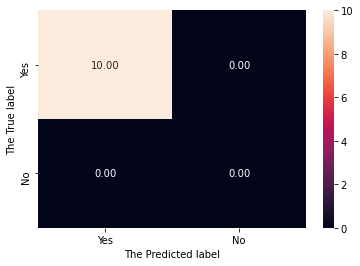

In [81]:
decisiontree_cm = metrics.confusion_matrix( decisiontree_test_prediction.predicted,
                                 decisiontree_test_prediction.actual,
                                 [1,0] )
sns.heatmap(decisiontree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('The True label')
plt.xlabel('The Predicted label')


### Visualization of the decision tree

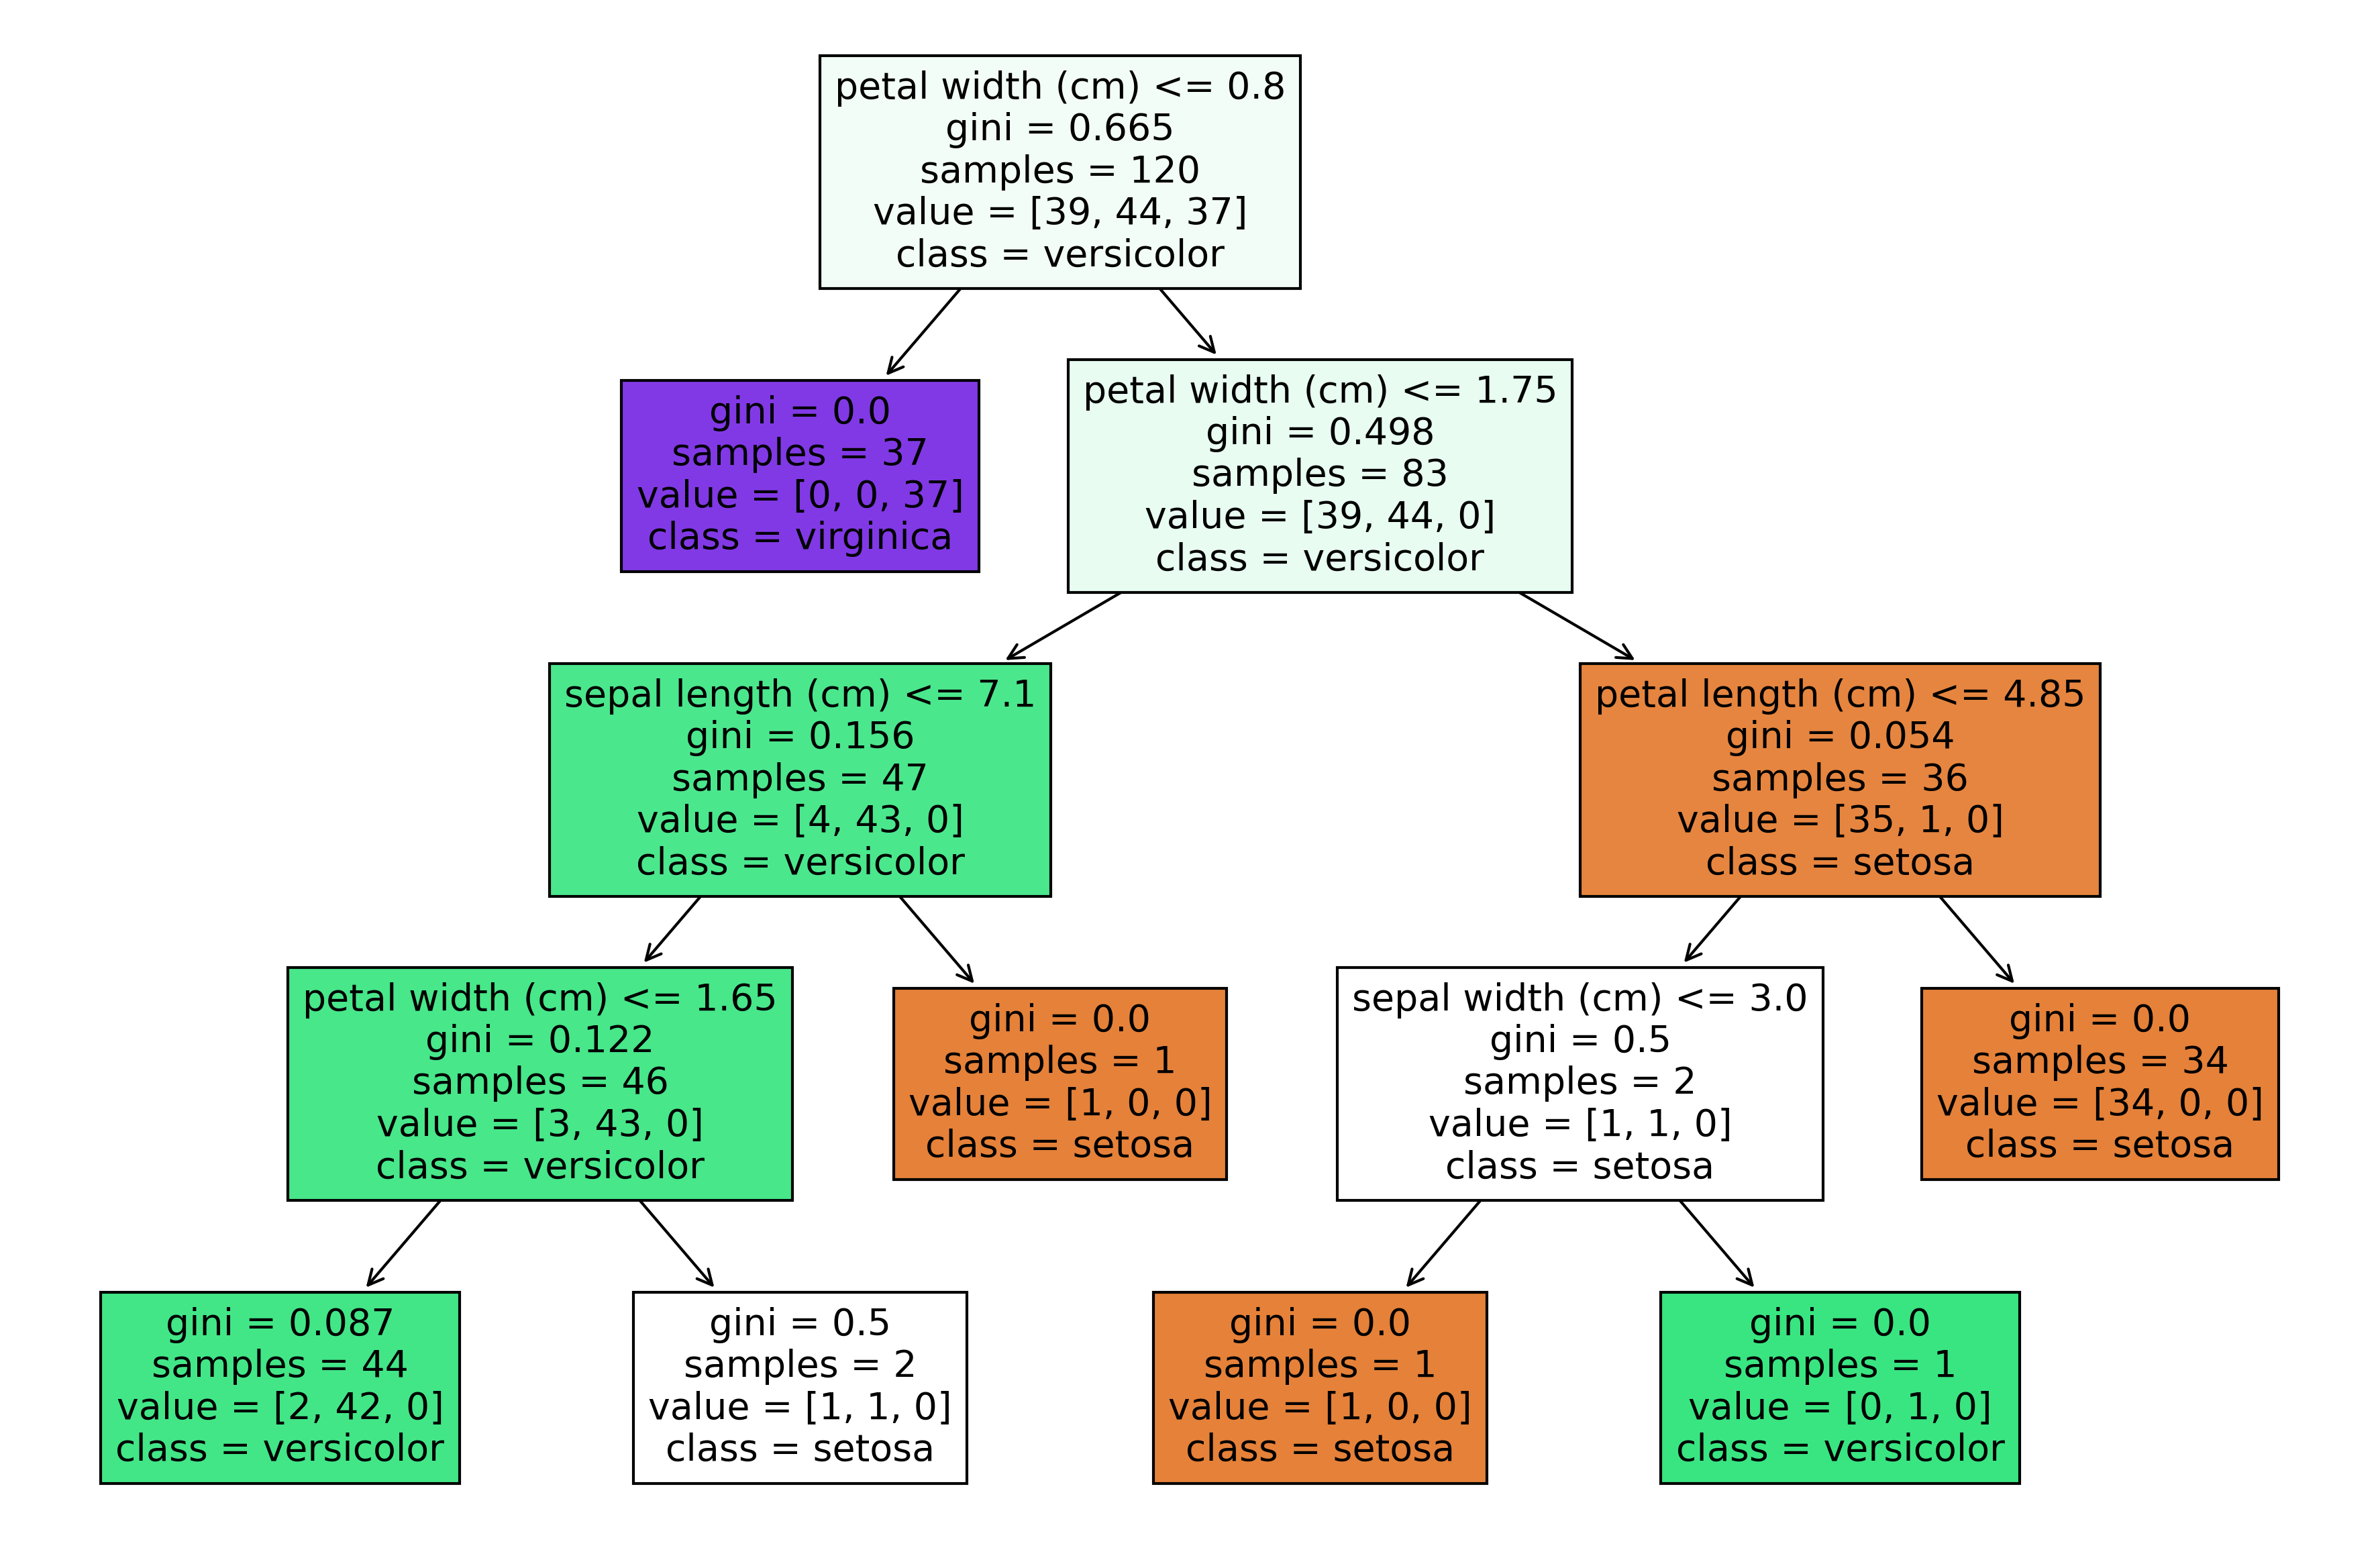

In [82]:
from sklearn import tree
featurenames=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
classnames=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(decisiontreeclassifier,
               feature_names = featurenames, 
               class_names=classnames,
               filled = True);
fig.savefig('decisiontree.png')